## Titanic: Machine learning from disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this tutorial, we will use passenger data to predict who survived the shipwreck and also use our predictive model to answer the question: "what sorts of people were more likely to survive?". We will focus on passenger age, gender and socio-economic class). You can read more about the Titanic dataset [here](https://www.kaggle.com/c/titanic/overview).

This is the advancced version of the tutorial, where we will learn how to build our own classifiers.
First, import packages and load the data.

In [1]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    filepath = "https://raw.githubusercontent.com/lm2612/Tutorials/refs/heads/main/2_supervised_learning_classification/titanic.csv"
    print(f"Notebook running in google colab. Using raw github filepath = {filepath}")

else:
    filepath = "../titanic.csv"
    print(f"Notebook running locally. Using local filepath = {filepath}")


Notebook running locally. Using local filepath = ../titanic.csv


In [3]:
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We are interested in the "Survived" column, where are two possible outcomes: survived (1) or did not survive (0). We want to build a classifier to predict this outcome. Specifically, we are going to investigate how the passenger class, age and sex influenced survival.

For passenger class, we are going to use dummy variables to represent the three possible states: binary variables which take on the value 0 if not true and 1 if true.

Create dummy variables for classes 1 and 2. This implicitly means that the 3rd class will be the base case that we compare to.

In [4]:
df.loc[df['Pclass']==3, 'Pclass'] = 0
df.loc[df['Pclass']==2, 'Pclass'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Create a dummy variable equal to 1 if the passenger was female.


In [5]:
df.loc[df['Sex']=='male', 'Sex'] = 0
df.loc[df['Sex']=='female', 'Sex'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


For age, we are going to split the data up into three segments: (i) those aged 16 or less; (ii) those between 16 and 60; (iii) and those over 60. Create dummy variables for categories (i) and (iii).

In [6]:
def age_category(age):
    if age <= 16:
        return 1
    elif age > 60:
        return 2
    else:
        return 0
df.loc['Age'] = df['Age'].apply(age_category)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,0.0,"Braund, Mr. Owen Harris",0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,0.0,"Heikkinen, Miss. Laina",1,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,0.0,"Allen, Mr. William Henry",0,35.0,0.0,0.0,373450,8.0500,NaN,S


Clean up the data - drop all variables except for the 'Age', 'Sex', 'Pclass' for our inputs and  'Survived' for our outputs.

In [7]:
df = df[['Age', 'Sex', 'Pclass', 'Survived']]
df = df.dropna()
df.head()

,Age,Sex,Pclass,Survived
0,22.0,0,0.0,0.0
1,38.0,1,1.0,1.0
2,26.0,1,0.0,1.0
3,35.0,1,1.0,1.0
4,35.0,0,0.0,0.0


Split the data into training, validation and test data

In [8]:
# Split into ~60% training, 20% validation, 20% test
training = df.iloc[:109, :]
validation = df.iloc[109:145, :]
testing = df.iloc[145:, :]

Set up your X and y variables


In [9]:
X = training[['Age', 'Sex', 'Pclass']].values
y = training['Survived'].values

## Logistic Regression
Here we will create our own logistic regression classifier.


Write an R function for the logistic function: $\theta = \frac{1}{1 + \exp(-x)}$. The function takes \(x\) as its sole argument. Plot the function.


In [10]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

Text(0, 0.5, 'theta')

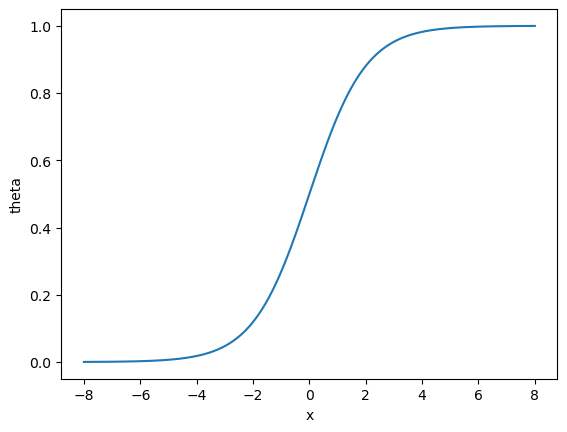

In [11]:
x = np.linspace(-8, 8, 1000)
theta = logistic(x)
plt.plot(x, theta)
plt.xlabel("x")
plt.ylabel("theta")

We are going to use the logistic function to represent the probability of a passenger surviving. But to do so, we need to write a function which returns the linear combination of $(\beta_0 + \beta_1 z_1 + \beta_2 z_2)$. The function should take as inputs $ ( \beta_0, \beta_1, \beta_2 )$ (the regression parameters) and the covariates $z_1$ and $z_2$.


In [12]:
def linear_combination(beta_0, beta_1, beta_2, z_1, z_2):
    return beta_0 + beta_1 * z_1 + beta_2 * z_2

Write a function which returns the probability:

$$\theta_i = Logistic(\beta_0 + \beta_1 * z_1 + \beta_2 * z_2) $$

where $Logistic$ is the function you created above. The function should takes as input $ ( \beta_0, \beta_1, \beta_2 )$ (the regression parameters) and the covariates $z_1$ and $z_2$.

In [13]:
def probability(beta_0, beta_1, beta_2, z_1, z_2):
    return logistic(linear_combination(beta_0, beta_1, beta_2, z_1, z_2))

We are now going to write a function which returns the log-likelihood for a single set, $i$ of data points: $(z_{1i}, z_{2i}, Si)$ where $S_i\in{0,1}$ represents whether a passenger survived (1) or not (0). In logistic regression, we assume that $S_i \sim Bernoulli(\theta_i)$. This means that the likelihood, $L_i$, for a single set of data points is given by:

$$ L_i = \theta_i^{S_i} (1-\theta_i)^{1-S_i} $$

Write a function with takes as input $ ( \beta_0, \beta_1, \beta_2 )$ (the regression parameters) and the covariates $z_1$ and $z_2$ and (crucially!) a value of $S_i$ and returns the likelihood $L_i$

.


In [14]:
def likelihood_i(S_i, beta_0, beta_1, beta_2, z_1, z_2):
    theta_i = probability(beta_0, beta_1, beta_2, z_1, z_2)
    return theta_i**S_i * (1 - theta_i)**(1 - S_i)


The overall likelihood of observations is given by the product of the individual likelihoods of each data point, since we assume that the data are (conditionally) independent given the parameters:

$$ L = \prod_i^{N} L_i $$

Write a function that takes as input your processed Titanic dataset and the parameters $\beta_0, \beta_1, \beta_2$ 
and returns the likelihood. In calculating the likelihood, specify that $z_1$ and $z_2$ should be your class dummies.

In [15]:
def likelihood(beta_0, beta_1, beta_2, df):
    val = 1
    for i in range(len(df)):
        row = df.iloc[i, :]
        val = val * likelihood_i(row["Survived"], beta_0, beta_1, beta_2,
                                      row["Pclass"], row["Sex"])
    return val


We are now going to try to estimate the parameters $\beta_0$ and $\beta_1$ by doing a grid search. We start by fixing $\beta_0=-1.14$  (this is the maximum likelihood value of the parameter). We are then going to do a grid search across all combinations of the following values of  $\beta_1=(0,1,1.67,2,2.5)$ $\beta_2=(−1,0,1,2,3)$. For each of the 25 combinations of both sets of parameters, calculate the likelihood. In doing so, find parameters that are close to the maximum likelihood values.

In [16]:
beta_0 = -1.14
beta_1 = [0, 1, 1.67, 2, 2.5]
beta_2 = [-1, 0, 1, 2, 3]
likelihood_grid = np.zeros((len(beta_1), len(beta_2)))

for i in range(len(beta_1)):
    for j in range(len(beta_2)):
        likelihood_grid[i, j] = likelihood(beta_0, beta_1[i], beta_2[j], df)

        
likelihood_grid

array([[4.62279753e-297, 2.37123499e-230, 2.97501929e-184,
        2.88486865e-165, 1.83983186e-169],
       [9.52316371e-250, 1.35639668e-195, 5.18167196e-166,
        3.79094954e-161, 1.41890364e-173],
       [2.31868891e-236, 3.32988221e-193, 1.07678214e-173,
        5.78066871e-175, 3.07604476e-190],
       [9.13707559e-236, 3.96260417e-198, 1.14210418e-182,
        4.90384366e-186, 3.34402294e-202],
       [4.43581437e-242, 3.60030076e-212, 1.53022640e-201,
        3.50550432e-207, 2.84284517e-224]])

In [17]:
beta_0 = -1.14
beta_1 = [0, 1, 1.67, 2, 2.5]
beta_2 = [-1, 0, 1, 2, 3]
likelihood_grid = np.zeros((len(beta_1), len(beta_2)))

for i in range(len(beta_1)):
    for j in range(len(beta_2)):
        likelihood_grid[i, j] = likelihood(beta_0, beta_1[i], beta_2[j], df)

        
likelihood_grid

array([[4.62279753e-297, 2.37123499e-230, 2.97501929e-184,
        2.88486865e-165, 1.83983186e-169],
       [9.52316371e-250, 1.35639668e-195, 5.18167196e-166,
        3.79094954e-161, 1.41890364e-173],
       [2.31868891e-236, 3.32988221e-193, 1.07678214e-173,
        5.78066871e-175, 3.07604476e-190],
       [9.13707559e-236, 3.96260417e-198, 1.14210418e-182,
        4.90384366e-186, 3.34402294e-202],
       [4.43581437e-242, 3.60030076e-212, 1.53022640e-201,
        3.50550432e-207, 2.84284517e-224]])

Find the values of `beta_1` and `beta_2` in the grid with the maximum likelihood (note, if you are using `np.argmax`, the output index will be flattened, `np.unravel_index` may be helpful.)

In [18]:
likelihood_grid

array([[4.62279753e-297, 2.37123499e-230, 2.97501929e-184,
        2.88486865e-165, 1.83983186e-169],
       [9.52316371e-250, 1.35639668e-195, 5.18167196e-166,
        3.79094954e-161, 1.41890364e-173],
       [2.31868891e-236, 3.32988221e-193, 1.07678214e-173,
        5.78066871e-175, 3.07604476e-190],
       [9.13707559e-236, 3.96260417e-198, 1.14210418e-182,
        4.90384366e-186, 3.34402294e-202],
       [4.43581437e-242, 3.60030076e-212, 1.53022640e-201,
        3.50550432e-207, 2.84284517e-224]])

Text(0, 0.5, 'beta_2')

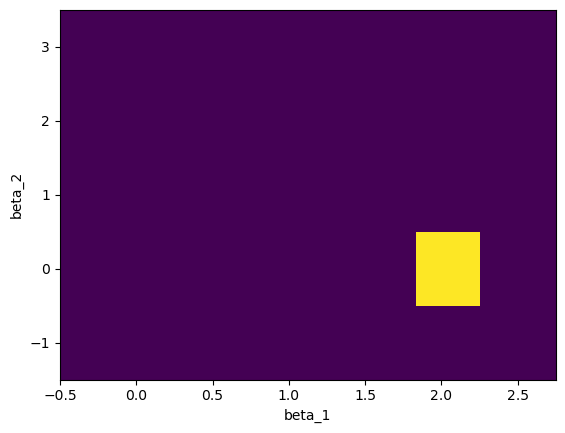

In [19]:
# First check how the likelihood looks as we traverse beta_1 and beta_2
plt.pcolormesh(beta_1, beta_2, likelihood_grid, shading="nearest")
plt.xlabel("beta_1")
plt.ylabel("beta_2")

In [20]:
likelihood_grid.shape

(5, 5)

In [21]:
likelihood_grid.max()

3.790949535080127e-161

In [22]:
np.argwhere(likelihood_grid==likelihood_grid.max())

array([[1, 3]])

In [23]:
max_likelihood_inds = np.unravel_index(np.argmax(likelihood_grid), likelihood_grid.shape)
max_likelihood_inds

(1, 3)

In [24]:
beta_1_mle = beta_1[max_likelihood_inds[1]]
beta_2_mle = beta_2[max_likelihood_inds[0]]
max_likelihood = likelihood_grid[max_likelihood_inds]
print(f"max likelihood {max_likelihood} when beta_1 = {beta_1_mle} and beta_2 = {beta_2_mle}")

max likelihood 3.790949535080127e-161 when beta_1 = 2 and beta_2 = 0


In [25]:
likelihood(beta_0, beta_1[i], beta_2[j], df)

2.8428451724425197e-224

In [26]:
import sklearn
from sklearn.linear_model import LogisticRegression

# Set up and fit the logistic regression model
reg = LogisticRegression()
reg.fit(X, y)
reg.coef_

array([[-0.01769296,  2.24134769,  1.1914833 ]])

In [27]:
reg.intercept_

array([-1.7842204])